# Desafío Data Scientist - LATAM Airlines

## 0. Introducción

Como parte del desafío LATAM se presenta una serie de problemas a responder a lo largo de este notebook en python 3. Para lo cual, se ha provisto de un archivo CSV con el dataset a usar y archivos vinculados a la solución (url: https://github.com/Mishagk/LATAM-Desafio-DS). 
<br><br>
Con todo esto, la principal problematica a responder o desarrollar es *"predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL)"*

## 1. Librerias

Previo a ejecutar este notebook se creará un entorno virtual en Anaconda (env name: latam1) en python 3.9.13.

In [1]:
# Version de python en entorno virtual de Anaconda
!python --version

Python 3.9.13


NOTA: Es importante que se ejecute el código con la versión de python indicada ya que las librerias dependen del mismo

Se procede a instalar las principales librerias a utilizar

In [2]:
# Instalar principales librerias

!pip install --upgrade scikit-learn
!pip install numpy
!pip install pandas
!pip install scipy
!pip install seaborn
!pip install matplotlib

Con las librerias instaladas, se realiza la importación de las mismas

In [139]:
# Importar librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sys

import warnings
warnings.filterwarnings("ignore")  # Ignorar las advertencias, pero SI muestra los errores

In [265]:
# Version de las librerias

print(skl.__version__)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.1.3
1.23.4
1.5.1
0.12.1


# 2. Carga de Datos

In [348]:
# Leer datos desde la URL de github

# URL a github
url_github = "https://raw.githubusercontent.com/Mishagk/LATAM-Desafio-DS/master/dataset_SCL.csv"

# leer datos
data = pd.read_csv(url_github,sep=',',quotechar='"')

# ver primeras 5 filas
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


In [349]:
# informacion general de tabla

print('Cantidad columnas :',data.shape[1])
print('Cantidad registros:',data.shape[0])

Cantidad columnas : 18
Cantidad registros: 68206


El dataset leido contiene registro de los vuelos de aviones que aterrizaron o despegaron en Santiago de Chile (SCL). La descripción de cada variable:
<br>
- `Fecha-I` : Fecha y hora programada del vuelo.
- `Vlo-I` : Número de vuelo programado.
- `Ori-I` : Código de ciudad de origen programado.
- `Des-I` : Código de ciudad de destino programado.
- `Emp-I` : Código aerolínea de vuelo programado.
- `Fecha-O` : Fecha y hora de operación del vuelo.
- `Vlo-O`: Número de vuelo de operación del vuelo.
- `Ori-O` : Código de ciudad de origen de operación
- `Des-O` : Código de ciudad de destino de operación.
- `Emp-O` : Código aerolínea de vuelo operado.
- `DIA` : Día del mes de operación del vuelo.
- `MES` : Número de mes de operación del vuelo.
- `AÑO` : Año de operación del vuelo.
- `DIANOM` : Día de la semana de operación del vuelo.
- `TIPOVUELO` : Tipo de vuelo, I =Internacional, N =Nacional.
- `OPERA` : Nombre de aerolínea que opera.
- `SIGLAORI` : Nombre ciudad origen.
- `SIGLADES` : Nombre ciudad destino.

## 3. Analisis y Preparación de Datos

### 3.1. Calidad de Datos

En esta sección revisaremos el estado de los datos en su condición de origen.

In [350]:
# Ver todas las columnas disponibles, la cantidad de datos nulos y el tipo de datos según se haya leido
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha-I    68206 non-null  object 
 1   Vlo-I      68167 non-null  object 
 2   Ori-I      68167 non-null  object 
 3   Des-I      68167 non-null  object 
 4   Emp-I      68167 non-null  object 
 5   Fecha-O    68167 non-null  object 
 6   Vlo-O      68166 non-null  object 
 7   Ori-O      68167 non-null  object 
 8   Des-O      68167 non-null  object 
 9   Emp-O      68167 non-null  object 
 10  DIA        68167 non-null  float64
 11  MES        68167 non-null  float64
 12  AÑO        68167 non-null  float64
 13  DIANOM     68167 non-null  object 
 14  TIPOVUELO  68167 non-null  object 
 15  OPERA      68167 non-null  object 
 16  SIGLAORI   68167 non-null  object 
 17  SIGLADES   68167 non-null  object 
dtypes: float64(3), object(15)
memory usage: 9.4+ MB


In [351]:
# Ver cuantos datos "vacios" o "nulos" se tienen desde informacion origen (data raw)
data.isnull().sum()

Fecha-I       0
Vlo-I        39
Ori-I        39
Des-I        39
Emp-I        39
Fecha-O      39
Vlo-O        40
Ori-O        39
Des-O        39
Emp-O        39
DIA          39
MES          39
AÑO          39
DIANOM       39
TIPOVUELO    39
OPERA        39
SIGLAORI     39
SIGLADES     39
dtype: int64

Observamos que hay en común cerca de **39** registros con datos nulos, acontinuación veremos dichos casos

In [352]:
# Revisar los casos que poseen al menos 1 dato NaN en el registro
data_nan = data[data.isnull().any(axis=1)].copy()

# Datos sin NaN - La data con datos completos
data_com = data[~data.index.isin(data_nan.index)].copy()

# info
print('Cantidad de registros completos:',data_com.shape[0])
print('Cantidad de registros con algun NAN:',data_nan.shape[0])

# ver datos con NaN
data_nan.head()

Cantidad de registros completos: 68166
Cantidad de registros con algun NAN: 40


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19.0,1.0,2017.0,Jueves,I,Latin American Wings,Santiago,Lima
17059,"2017-03-08 06:20:00,1351,SCEL,SBCT,LAN,2017-03...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17060,"2017-03-06 14:20:00,1357,SCEL,SBCT,LAN,2017-03...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39316,"2017-08-10 20:15:00,8541,SCEL,SBCT,ONE,2017-08...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55332,"2017-10-03 08:00:00,7896,SCEL,SANU,LAN,2017-10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Segun los datos extraidos se observa en la primera columna que cuando se leyó (pd.read_csv) han habido 39 registros que leyó como una sola cadena de texto

In [353]:
# Ver un caso de la mala lectura
data_nan.iloc[1,0] # seleccionar fila 1, columna 0

'2017-03-08 06:20:00,1351,SCEL,SBCT,LAN,2017-03-08 06:10:00,1351,SCEL,SBCT,LAN,8,3,2017,Miercoles,I,Grupo LATAM,Santiago,"Curitiba, Bra."'

Al observarse el texto **"Curitiba, Bra."**, se infiere que la coma (`,`) posiblemente generó la incorrecta lectura para las **39** filas detectadas con `NaN`.
<br><br>
Dado que la logica detectada es: Dento de la ultima variable que posee una coma (`,`) entre doble comillas (`"texto"`), se creará un codigo que permita detectar dicha subcadena y cambiar la coma por un guion (`"-"`), para finalmente separar los valores en sus respectivas columnas.

In [354]:
# Script de corrección y separación de valores

# leemos fila por fila de los datos extraidos
for i in range(data_nan.shape[0]):
    
    # Solo aquellas filas que posean NaN en todas excepto la primera columna NaN
    if(data_nan.iloc[i,:].isnull().sum() == 17):
        
        # extraer sub-cadena entre ""
        subtext = re.search('"(.*)"',data_nan.iloc[i,0]).group(1)
        
        # Corregir la subcadena de texto mediante el reemplazo de caracteres
        subtext_new = subtext.replace(",","-").replace("- ","-")
        texto = data_nan.iloc[i,0].replace(subtext,subtext_new).replace('"','') # Reemplazar texto completo
        
         # dividir en los valores de las columnas
        lista_valores = texto.split(",")
        
        # En caso en la lista obtenida existan 18 valores se actualiza
        if(len(lista_valores) == 18):
            data_nan.iloc[i,:] = lista_valores

# ver valores corregidos
data_nan.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19.0,1.0,2017.0,Jueves,I,Latin American Wings,Santiago,Lima
17059,2017-03-08 06:20:00,1351,SCEL,SBCT,LAN,2017-03-08 06:10:00,1351,SCEL,SBCT,LAN,8,3,2017,Miercoles,I,Grupo LATAM,Santiago,Curitiba-Bra.
17060,2017-03-06 14:20:00,1357,SCEL,SBCT,LAN,2017-03-06 14:26:00,1357,SCEL,SBCT,LAN,6,3,2017,Lunes,I,Grupo LATAM,Santiago,Curitiba-Bra.
39316,2017-08-10 20:15:00,8541,SCEL,SBCT,ONE,2017-08-10 20:11:00,8541,SCEL,SBCT,ONE,10,8,2017,Jueves,I,Oceanair Linhas Aereas,Santiago,Curitiba-Bra.
55332,2017-10-03 08:00:00,7896,SCEL,SANU,LAN,2017-10-03 08:00:00,7896,SCEL,SANU,DSM,3,10,2017,Martes,I,Grupo LATAM,Santiago,San Juan-Arg.


In [355]:
# Obtener un dataframe consolidado entre los dataframes completos y NaN corregidos. Adicional, ver la cantidad de registros nulos

try:
    # Concatenar ambos dataframes
    data = pd.concat([data_com.copy(),data_nan.copy()])

    # Borramos de memoria los anteriores
    del data_com, data_nan
    
except:
    print('[Info Advertencia] Se borraron previamente los dataframes')

# info
print('Cantidad de registros al concatenar dataframes:',data.shape[0])
print('--------------------------------------------------------')

# Revisamos nuevamente los datos nulos en la nueva data
print('Cantidad de datos NaN por variable:')
data.isnull().sum()

Cantidad de registros al concatenar dataframes: 68206
--------------------------------------------------------
Cantidad de datos NaN por variable:


Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Observamos que solo hay **1** registro con NaN, donde el campo faltante es el **número de vuelo de operación** (`Vlo-O`)

In [356]:
data[data.isnull().any(axis=1)].copy()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19.0,1.0,2017.0,Jueves,I,Latin American Wings,Santiago,Lima


Solo para ver si podemos completar el dato faltante, filtramos aquellos registros con columnas comunes como `Emp-I`,`Emp-O` y `OPERA`

In [357]:
data[(data["Emp-I"]=="LAW") & (data["Emp-O"]=="56R") & (data["OPERA"]=="Latin American Wings")].sort_values(by=["Fecha-I","Vlo-I","Ori-I","Des-I","Emp-I"])

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6094,2017-01-02 01:15:00,704,SCEL,SPJC,LAW,2017-01-02 01:34:00,704,SCEL,SPJC,56R,2.0,1.0,2017.0,Lunes,I,Latin American Wings,Santiago,Lima
6107,2017-01-03 01:15:00,1704,SCEL,SPJC,LAW,2017-01-03 02:38:00,1700,SCEL,SPJC,56R,3.0,1.0,2017.0,Martes,I,Latin American Wings,Santiago,Lima
6079,2017-01-04 01:15:00,700,SCEL,SPJC,LAW,2017-01-04 02:25:00,700,SCEL,SPJC,56R,4.0,1.0,2017.0,Miercoles,I,Latin American Wings,Santiago,Lima
6095,2017-01-05 01:15:00,704,SCEL,SPJC,LAW,2017-01-05 01:15:00,708,SCEL,SPJC,56R,5.0,1.0,2017.0,Jueves,I,Latin American Wings,Santiago,Lima
6080,2017-01-06 01:15:00,700,SCEL,SPJC,LAW,2017-01-06 02:18:00,700,SCEL,SPJC,56R,6.0,1.0,2017.0,Viernes,I,Latin American Wings,Santiago,Lima
6082,2017-01-08 01:15:00,700,SCEL,SPJC,LAW,2017-01-08 02:01:00,700,SCEL,SPJC,56R,8.0,1.0,2017.0,Domingo,I,Latin American Wings,Santiago,Lima
6096,2017-01-09 01:15:00,704,SCEL,SPJC,LAW,2017-01-09 02:15:00,704,SCEL,SPJC,56R,9.0,1.0,2017.0,Lunes,I,Latin American Wings,Santiago,Lima
6097,2017-01-10 01:15:00,704,SCEL,SPJC,LAW,2017-01-10 02:36:00,704,SCEL,SPJC,56R,10.0,1.0,2017.0,Martes,I,Latin American Wings,Santiago,Lima
6083,2017-01-11 01:15:00,700,SCEL,SPJC,LAW,2017-01-11 01:20:00,700,SCEL,SPJC,56R,11.0,1.0,2017.0,Miercoles,I,Latin American Wings,Santiago,Lima
6098,2017-01-12 01:15:00,704,SCEL,SPJC,LAW,2017-01-12 01:55:00,702,SCEL,SPJC,56R,12.0,1.0,2017.0,Jueves,I,Latin American Wings,Santiago,Lima


Observamos la ultima fila, el registro con el dato `NaN`, hay 2 vuelos para la fecha del 2017-01-19 (`Fecha_I`). Debido a que hay casos donde el `Vlo-I` no es igual a `Vlo-O`, no podriamos inferir necesariamente que `Vlo-O` para dicho caso tenga que ser valor **200**.
<br><br>
Para validar esto, podemos revisar aquellos casos donde se tuvo valor de `Vlo-I`=200 para ver si podria o no darse otro valor igual en `Vlo-O`

In [358]:
# Extraer valores 200 excepto aquellos registros con algun NaN
valida_Vlo = data[(data["Vlo-I"]=="200") & (~data.isnull().any(axis=1))][["Vlo-I","Vlo-O"]].copy()

# crear el par de valores existentes "Vlo-I_Vlo-O"
valida_Vlo["par"] = valida_Vlo["Vlo-I"].map(str) + "_" + valida_Vlo["Vlo-O"].map(str)

# Ver lista con valores encontrados
valida_Vlo["par"].unique().tolist()

['200_200']

Mediante esto vemos que todos aquellos vuelos registrados que tienen valor de **200** en `Vlo-I` también tienen ese valor en `Vlo-O`. Por lo que con mayor confianza podemos asignar este valor al dato faltante.

In [359]:
# Actualizar registro
indice_corrige = data[data.isnull().any(axis=1)].index

# Corrige
data.loc[indice_corrige,"Vlo-O"] = "200"

# ver dato corregido
data.loc[indice_corrige,:]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,200,SCEL,SPJC,56R,19.0,1.0,2017.0,Jueves,I,Latin American Wings,Santiago,Lima


### 3.2. Formateo y limpieza de datos

Mediante la observación a priori de los datos y usando la descripción del diccionario de cada variable se realizará el formateo de cada una.

In [360]:
# Creamos un backup previo al formateo de datos, para evaluar los casos donde el formato generará NaN por error
data_bkp = data.copy()

In [361]:
# Convertir de formato segun cada columna

data["Fecha-I"] = pd.to_datetime(data["Fecha-I"],format="%Y-%m-%d %H:%M:%S") # fecha
data["Vlo-I"] = pd.to_numeric(data["Vlo-I"], errors="coerce",downcast="integer") # entero
data["Ori-I"] = data["Ori-I"].map(str) # string
data["Des-I"] = data["Des-I"].map(str) # string
data["Emp-I"] = data["Emp-I"].map(str) # string
data["Fecha-O"] = pd.to_datetime(data["Fecha-O"],format="%Y-%m-%d %H:%M:%S") # fecha
data["Vlo-O"] = pd.to_numeric(data["Vlo-O"], errors="coerce",downcast="integer") # entero
data["Ori-O"] = data["Ori-O"].map(str) # string
data["Des-O"] = data["Des-O"].map(str) # string
data["Emp-O"] = data["Emp-O"].map(str) # string
data["DIA"] = pd.to_numeric(data["DIA"], errors="coerce",downcast="integer") # entero
data["MES"] = pd.to_numeric(data["MES"], errors="coerce",downcast="integer") # entero
data["AÑO"] = pd.to_numeric(data["AÑO"], errors="coerce",downcast="integer") # entero
data["DIANOM"] = data["DIANOM"].map(str) # string
data["TIPOVUELO"] = data["TIPOVUELO"].map(str) # string
data["OPERA"] = data["OPERA"].map(str) # string
data["SIGLAORI"] = data["SIGLAORI"].map(str) # string
data["SIGLADES"] = data["SIGLADES"].map(str) # string

# Ver tipo de datos de salida
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 67669
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68201 non-null  float64       
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68190 non-null  float64       
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int8          
 11  MES        68206 non-null  int8          
 12  AÑO        68206 non-null  int16         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [362]:
# ver datos formateados
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-01 23:33:00,226.0,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-02 23:39:00,226.0,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-03 23:39:00,226.0,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-04 23:33:00,226.0,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-05 23:28:00,226.0,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [363]:
# Datos que al formatear no se pudo y se cambiaron a NaN
data[data.isnull().any(axis=1)].copy()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
13906,2017-03-30 10:30:00,71.0,SCEL,SCIE,SKU,2017-03-30 10:50:00,NaN,SCEL,SCIE,SKU,30,3,2017,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071.0,SCEL,SCIE,SKU,2017-03-22 11:00:00,NaN,SCEL,SCIE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Concepcion
17055,2017-03-22 10:00:00,201.0,SCEL,SCIE,LXP,2017-03-22 11:50:00,NaN,SCEL,SCIE,LXP,22,3,2017,Miercoles,N,Grupo LATAM,Santiago,Concepcion
19207,2017-04-25 09:00:00,71.0,SCEL,SCIE,SKU,2017-04-25 09:29:00,NaN,SCEL,SCIE,SKU,25,4,2017,Martes,N,Sky Airline,Santiago,Concepcion
22167,2017-04-06 21:10:00,43.0,SCEL,SCIE,LAW,2017-04-06 21:24:00,NaN,SCEL,SCIE,JMR,6,4,2017,Jueves,N,Latin American Wings,Santiago,Concepcion
22232,2017-05-13 21:50:00,NaN,SCEL,SUMU,AAL,2017-05-13 21:52:00,989.0,SCEL,SUMU,AAL,13,5,2017,Sabado,I,American Airlines,Santiago,Montevideo
22301,2017-05-26 09:40:00,401.0,SCEL,LFPG,AFR,2017-05-26 10:03:00,NaN,SCEL,LFPG,AFR,26,5,2017,Viernes,I,Air France,Santiago,Paris
22302,2017-05-28 09:40:00,401.0,SCEL,LFPG,AFR,2017-05-28 09:43:00,NaN,SCEL,LFPG,AFR,28,5,2017,Domingo,I,Air France,Santiago,Paris
24304,2017-05-11 10:00:00,802.0,SCEL,SPJC,SKU,2017-05-11 10:36:00,NaN,SCEL,SPJC,SKU,11,5,2017,Jueves,I,Sky Airline,Santiago,Lima
27246,2017-05-15 12:15:00,114.0,SCEL,SCAT,LAN,2017-05-15 13:10:00,NaN,SCEL,SCAT,LAN,15,5,2017,Lunes,N,Grupo LATAM,Santiago,Copiapo


In [364]:
# De los datos backup vemos los valores previos al formateo
indice_lee = data[data.isnull().any(axis=1)].index
data_bkp[data_bkp.index.isin(indice_lee)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
13906,2017-03-30 10:30:00,71,SCEL,SCIE,SKU,2017-03-30 10:50:00,71R,SCEL,SCIE,SKU,30.0,3.0,2017.0,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071,SCEL,SCIE,SKU,2017-03-22 11:00:00,71R,SCEL,SCIE,SKU,22.0,3.0,2017.0,Miercoles,N,Sky Airline,Santiago,Concepcion
17055,2017-03-22 10:00:00,201,SCEL,SCIE,LXP,2017-03-22 11:50:00,201R,SCEL,SCIE,LXP,22.0,3.0,2017.0,Miercoles,N,Grupo LATAM,Santiago,Concepcion
19207,2017-04-25 09:00:00,71,SCEL,SCIE,SKU,2017-04-25 09:29:00,71R,SCEL,SCIE,SKU,25.0,4.0,2017.0,Martes,N,Sky Airline,Santiago,Concepcion
22167,2017-04-06 21:10:00,43,SCEL,SCIE,LAW,2017-04-06 21:24:00,43R,SCEL,SCIE,JMR,6.0,4.0,2017.0,Jueves,N,Latin American Wings,Santiago,Concepcion
22232,2017-05-13 21:50:00,989P,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13.0,5.0,2017.0,Sabado,I,American Airlines,Santiago,Montevideo
22301,2017-05-26 09:40:00,401,SCEL,LFPG,AFR,2017-05-26 10:03:00,401A,SCEL,LFPG,AFR,26.0,5.0,2017.0,Viernes,I,Air France,Santiago,Paris
22302,2017-05-28 09:40:00,401,SCEL,LFPG,AFR,2017-05-28 09:43:00,401B,SCEL,LFPG,AFR,28.0,5.0,2017.0,Domingo,I,Air France,Santiago,Paris
24304,2017-05-11 10:00:00,802,SCEL,SPJC,SKU,2017-05-11 10:36:00,802R,SCEL,SPJC,SKU,11.0,5.0,2017.0,Jueves,I,Sky Airline,Santiago,Lima
27246,2017-05-15 12:15:00,114,SCEL,SCAT,LAN,2017-05-15 13:10:00,114R,SCEL,SCAT,LAN,15.0,5.0,2017.0,Lunes,N,Grupo LATAM,Santiago,Copiapo


Con lo anterior, evidenciamos que las columnas `Vlo-I` y `Vlo-O` hay algunos valores que poseen una letra al final (`A`,`R`,`P`). Esto desde el negocio podría tener un significado específico pero dado que el diccionario nos indica que estos deberían ser numericos y en vista de que son una gran minoría de datos, se extraerán las letras finales.

In [366]:
# Aplicar backup
data = data_bkp.copy() # restaurar valores previos

# Extraer solo los caracteres numericos y filtrar las letras
data["Vlo-I"] = data["Vlo-I"].map(str).str.extract('([0-9]*)')
data["Vlo-O"] = data["Vlo-O"].map(str).str.extract('([0-9]*)')

# Ver los datos donde se realizaro la correccion
data[data_bkp.index.isin(indice_lee)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
13906,2017-03-30 10:30:00,71,SCEL,SCIE,SKU,2017-03-30 10:50:00,71,SCEL,SCIE,SKU,30.0,3.0,2017.0,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071,SCEL,SCIE,SKU,2017-03-22 11:00:00,71,SCEL,SCIE,SKU,22.0,3.0,2017.0,Miercoles,N,Sky Airline,Santiago,Concepcion
17055,2017-03-22 10:00:00,201,SCEL,SCIE,LXP,2017-03-22 11:50:00,201,SCEL,SCIE,LXP,22.0,3.0,2017.0,Miercoles,N,Grupo LATAM,Santiago,Concepcion
19207,2017-04-25 09:00:00,71,SCEL,SCIE,SKU,2017-04-25 09:29:00,71,SCEL,SCIE,SKU,25.0,4.0,2017.0,Martes,N,Sky Airline,Santiago,Concepcion
22167,2017-04-06 21:10:00,43,SCEL,SCIE,LAW,2017-04-06 21:24:00,43,SCEL,SCIE,JMR,6.0,4.0,2017.0,Jueves,N,Latin American Wings,Santiago,Concepcion
22232,2017-05-13 21:50:00,989,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13.0,5.0,2017.0,Sabado,I,American Airlines,Santiago,Montevideo
22301,2017-05-26 09:40:00,401,SCEL,LFPG,AFR,2017-05-26 10:03:00,401,SCEL,LFPG,AFR,26.0,5.0,2017.0,Viernes,I,Air France,Santiago,Paris
22302,2017-05-28 09:40:00,401,SCEL,LFPG,AFR,2017-05-28 09:43:00,401,SCEL,LFPG,AFR,28.0,5.0,2017.0,Domingo,I,Air France,Santiago,Paris
24304,2017-05-11 10:00:00,802,SCEL,SPJC,SKU,2017-05-11 10:36:00,802,SCEL,SPJC,SKU,11.0,5.0,2017.0,Jueves,I,Sky Airline,Santiago,Lima
27246,2017-05-15 12:15:00,114,SCEL,SCAT,LAN,2017-05-15 13:10:00,114,SCEL,SCAT,LAN,15.0,5.0,2017.0,Lunes,N,Grupo LATAM,Santiago,Copiapo


In [367]:
# Convertir de formato segun cada columna

data["Fecha-I"] = pd.to_datetime(data["Fecha-I"],format="%Y-%m-%d %H:%M:%S") # fecha
data["Vlo-I"] = pd.to_numeric(data["Vlo-I"], errors="coerce",downcast="integer") # entero
data["Ori-I"] = data["Ori-I"].map(str) # string
data["Des-I"] = data["Des-I"].map(str) # string
data["Emp-I"] = data["Emp-I"].map(str) # string
data["Fecha-O"] = pd.to_datetime(data["Fecha-O"],format="%Y-%m-%d %H:%M:%S") # fecha
data["Vlo-O"] = pd.to_numeric(data["Vlo-O"], errors="coerce",downcast="integer") # entero
data["Ori-O"] = data["Ori-O"].map(str) # string
data["Des-O"] = data["Des-O"].map(str) # string
data["Emp-O"] = data["Emp-O"].map(str) # string
data["DIA"] = pd.to_numeric(data["DIA"], errors="coerce",downcast="integer") # entero
data["MES"] = pd.to_numeric(data["MES"], errors="coerce",downcast="integer") # entero
data["AÑO"] = pd.to_numeric(data["AÑO"], errors="coerce",downcast="integer") # entero
data["DIANOM"] = data["DIANOM"].map(str) # string
data["TIPOVUELO"] = data["TIPOVUELO"].map(str) # string
data["OPERA"] = data["OPERA"].map(str) # string
data["SIGLAORI"] = data["SIGLAORI"].map(str) # string
data["SIGLADES"] = data["SIGLADES"].map(str) # string

# Ver tipo de datos de salida
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 67669
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  int16         
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  int16         
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int8          
 11  MES        68206 non-null  int8          
 12  AÑO        68206 non-null  int16         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [368]:
# ver datos
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### 3.3. Exploración de variables

En este segmento analizaremos como estan distribuidas las variables. Además, esto permitirá seguir afinando la limpieza y perfilamiento de los datos.

<b>Variables Categoricas

In [410]:
# Ver descripcion general de variables categoricas

datacat = data.select_dtypes(include=["object"])
datacat.describe()

,Ori-I,Des-I,Emp-I,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206
unique,1,64,30,1,63,32,7,2,23,1,62
top,SCEL,SCFA,LAN,SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,68206,5787,37611,68206,5786,20988,10292,36966,40892,68206,6335


-------------------------------
Variable:  Ori-I
  Ori-I   suma      %
0  SCEL  68206  100.0


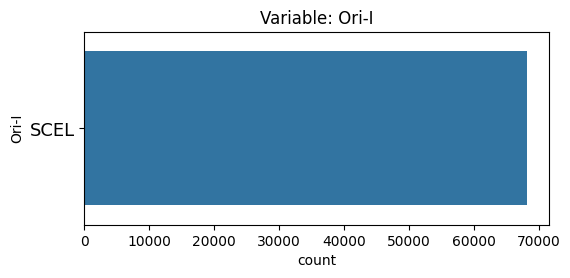

-------------------------------
Variable:  Des-I
   Des-I  suma     %
0   SCFA  5787  8.48
1   SPJC  5270  7.73
2   SCCF  5145  7.54
3   SCTE  4357  6.39
4   SCIE  3995  5.86
5   SCDA  3747  5.49
6   SBGR  3570  5.23
7   SAEZ  3240  4.75
8   SABE  3094  4.54
9   SCQP  2583  3.79
10  SCAR  2436  3.57
11  SCSE  2410  3.53
12  SCCI  2105  3.09
13  MPTO  1850  2.71
14  SCAT  1780  2.61
15  SAME  1625  2.38
16  SKBO  1604  2.35
17  SBGL  1434  2.10
18  SUMU  1066  1.56
19  SACO  1023  1.50
20  KMIA  1015  1.49
21  LEMD   894  1.31
22  SCBA   843  1.24
23  SCVD   753  1.10
24  MMMX   700  1.03
25  SCIP   452  0.66
26  SEGU   423  0.62
27  KJFK   383  0.56
28  NZAA   361  0.53
29  LFPG   359  0.53
30  KATL   358  0.52
31  KDFW   357  0.52
32  KIAH   335  0.49
33  CYYZ   283  0.41
34  SCJO   259  0.38
35  LIRF   259  0.38
36  SCPQ   235  0.34
37  SGAS   232  0.34
38  SLLP   209  0.31
39  EGLL   205  0.30
40  YSSY   195  0.29
41  SBFL   162  0.24
42  KLAX   155  0.23
43  SAAR   136  0.20
44  SL

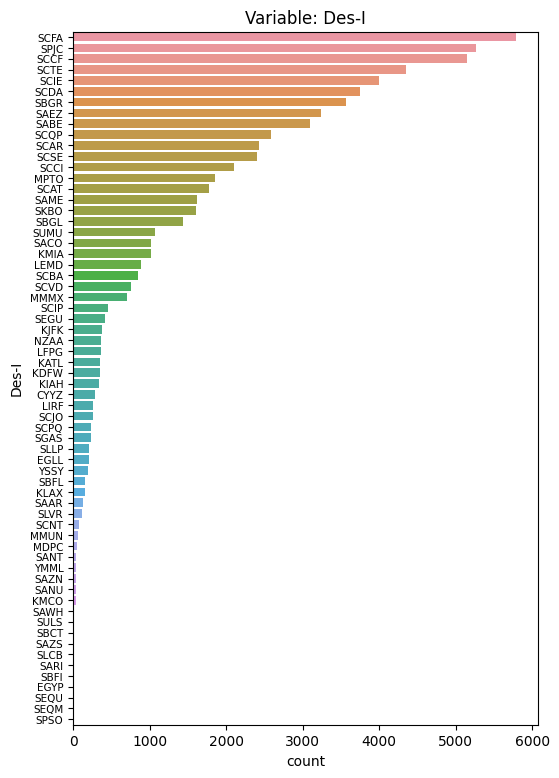

-------------------------------
Variable:  Emp-I
   Emp-I   suma      %
0    LAN  37611  55.14
1    SKU  14298  20.96
2    TAM   3049   4.47
3    ARG   1949   2.86
4    CMP   1850   2.71
5    LAW   1574   2.31
6    AVA   1152   1.69
7    JAT   1095   1.61
8    GLO    806   1.18
9    AAL    757   1.11
10   ACA    565   0.83
11   IBE    362   0.53
12   AFR    358   0.52
13   DAL    358   0.52
14   AMX    351   0.51
15   UAL    335   0.49
16   ONE    279   0.41
17   AZA    259   0.38
18   KLM    251   0.37
19   LAP    216   0.32
20   BAW    205   0.30
21   QFU    195   0.29
22   JMR    100   0.15
23   LRC     92   0.13
24   AUT     74   0.11
25   PUE     49   0.07
26   LXP      9   0.01
27   LPE      4   0.01
28   DSM      2   0.00
29   LNE      1   0.00


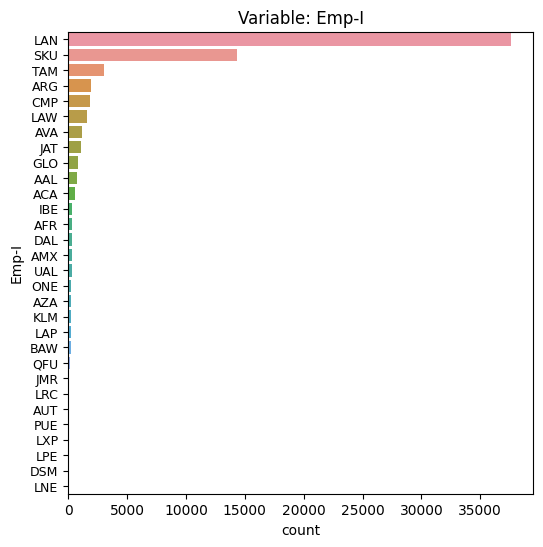

-------------------------------
Variable:  Ori-O
  Ori-O   suma      %
0  SCEL  68206  100.0


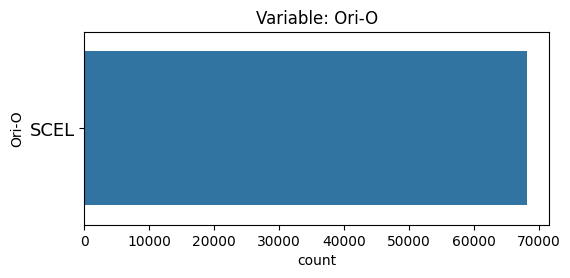

-------------------------------
Variable:  Des-O
   Des-O  suma     %
0   SCFA  5786  8.48
1   SPJC  5270  7.73
2   SCCF  5146  7.54
3   SCTE  4357  6.39
4   SCIE  3993  5.85
5   SCDA  3747  5.49
6   SBGR  3569  5.23
7   SAEZ  3241  4.75
8   SABE  3094  4.54
9   SCQP  2589  3.80
10  SCAR  2436  3.57
11  SCSE  2410  3.53
12  SCCI  2105  3.09
13  MPTO  1850  2.71
14  SCAT  1780  2.61
15  SAME  1625  2.38
16  SKBO  1604  2.35
17  SBGL  1435  2.10
18  SUMU  1066  1.56
19  SACO  1023  1.50
20  KMIA  1016  1.49
21  LEMD   894  1.31
22  SCBA   839  1.23
23  SCVD   753  1.10
24  MMMX   700  1.03
25  SCIP   452  0.66
26  SEGU   422  0.62
27  KJFK   382  0.56
28  NZAA   361  0.53
29  LFPG   359  0.53
30  KATL   358  0.52
31  KDFW   357  0.52
32  KIAH   334  0.49
33  CYYZ   283  0.41
34  SCJO   259  0.38
35  LIRF   259  0.38
36  SCPQ   235  0.34
37  SGAS   232  0.34
38  SLLP   209  0.31
39  EGLL   205  0.30
40  YSSY   194  0.28
41  SBFL   162  0.24
42  KLAX   155  0.23
43  SAAR   136  0.20
44  SL

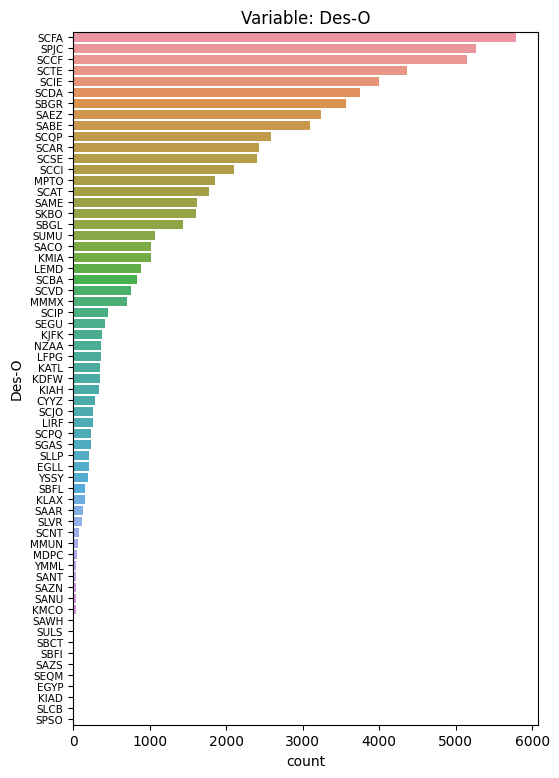

-------------------------------
Variable:  Emp-O
   Emp-O   suma      %
0    LAN  20988  30.77
1    LXP  14558  21.34
2    SKU  14298  20.96
3    TAM   3046   4.47
4    ARG   1946   2.85
5    CMP   1850   2.71
6    JMR   1647   2.41
7    LPE   1214   1.78
8    JAT   1095   1.61
9    AVA    885   1.30
10   GLO    806   1.18
11   AAL    757   1.11
12   ACA    565   0.83
13   DSM    493   0.72
14   LNE    374   0.55
15   IBE    362   0.53
16   DAL    358   0.52
17   AFR    358   0.52
18   LRC    357   0.52
19   AMX    351   0.51
20   UAL    335   0.49
21   ONE    279   0.41
22   AZA    259   0.38
23   KLM    251   0.37
24   LAP    219   0.32
25   BAW    205   0.30
26   QFA    195   0.29
27   AUT     77   0.11
28   PUE     49   0.07
29   56R     17   0.02
30   48O     10   0.01
31   TPU      2   0.00


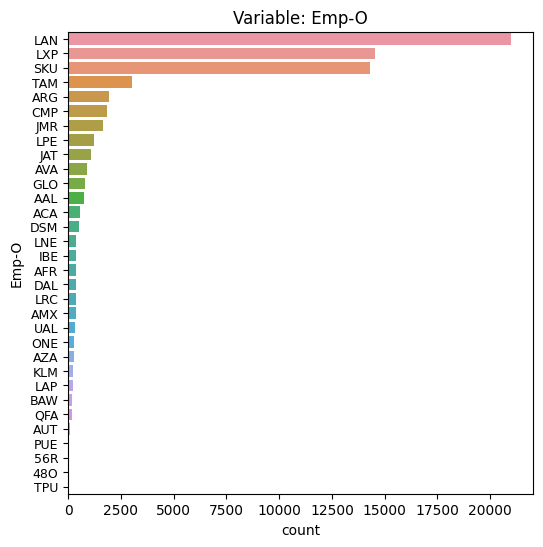

-------------------------------
Variable:  DIANOM
      DIANOM   suma      %
0    Viernes  10292  15.09
1     Jueves  10251  15.03
2      Lunes  10131  14.85
3    Domingo   9796  14.36
4  Miercoles   9722  14.25
5     Martes   9662  14.17
6     Sabado   8352  12.25


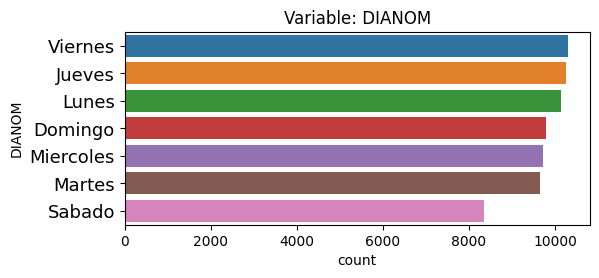

-------------------------------
Variable:  TIPOVUELO
  TIPOVUELO   suma     %
0         N  36966  54.2
1         I  31240  45.8


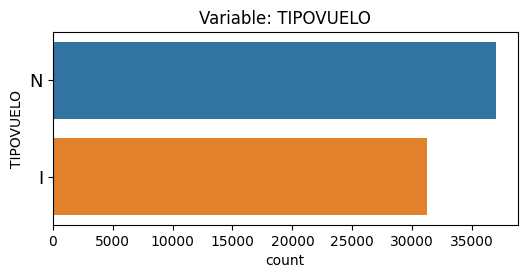

-------------------------------
Variable:  OPERA
                       OPERA   suma      %
0                Grupo LATAM  40892  59.95
1                Sky Airline  14298  20.96
2      Aerolineas Argentinas   1949   2.86
3                   Copa Air   1850   2.71
4       Latin American Wings   1674   2.45
5                    Avianca   1152   1.69
6               JetSmart SPA   1095   1.61
7                  Gol Trans    806   1.18
8          American Airlines    757   1.11
9                 Air Canada    565   0.83
10                    Iberia    362   0.53
11                 Delta Air    358   0.52
12                Air France    358   0.52
13                Aeromexico    351   0.51
14           United Airlines    335   0.49
15    Oceanair Linhas Aereas    279   0.41
16                  Alitalia    259   0.38
17                    K.L.M.    251   0.37
18           British Airways    205   0.30
19            Qantas Airways    195   0.29
20                     Lacsa     92   0.13
21   

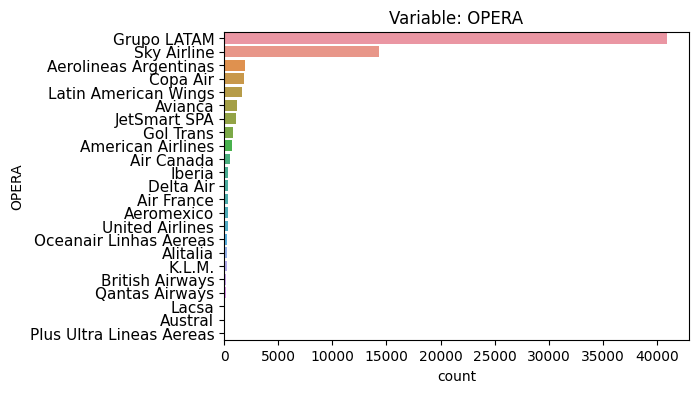

-------------------------------
Variable:  SIGLAORI
   SIGLAORI   suma      %
0  Santiago  68206  100.0


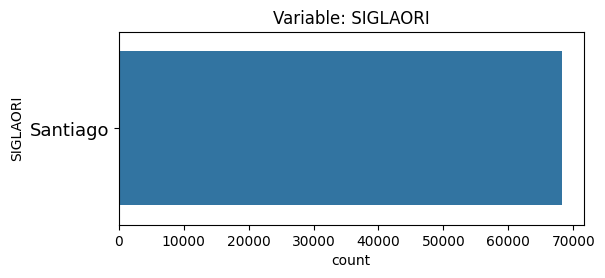

-------------------------------
Variable:  SIGLADES
            SIGLADES  suma     %
0       Buenos Aires  6335  9.29
1        Antofagasta  5786  8.48
2               Lima  5270  7.73
3             Calama  5146  7.54
4       Puerto Montt  4357  6.39
5         Concepcion  3993  5.85
6            Iquique  3747  5.49
7          Sao Paulo  3569  5.23
8             Temuco  2589  3.80
9              Arica  2436  3.57
10         La Serena  2410  3.53
11      Punta Arenas  2105  3.09
12  Ciudad de Panama  1850  2.71
13           Copiapo  1780  2.61
14           Mendoza  1625  2.38
15            Bogota  1604  2.35
16    Rio de Janeiro  1435  2.10
17        Montevideo  1066  1.56
18           Cordoba  1023  1.50
19             Miami  1016  1.49
20            Madrid   894  1.31
21         Balmaceda   839  1.23
22          Valdivia   753  1.10
23  Ciudad de Mexico   700  1.03
24    Isla de Pascua   452  0.66
25         Guayaquil   422  0.62
26        Nueva York   382  0.56
27     Auckland N.Z.   3

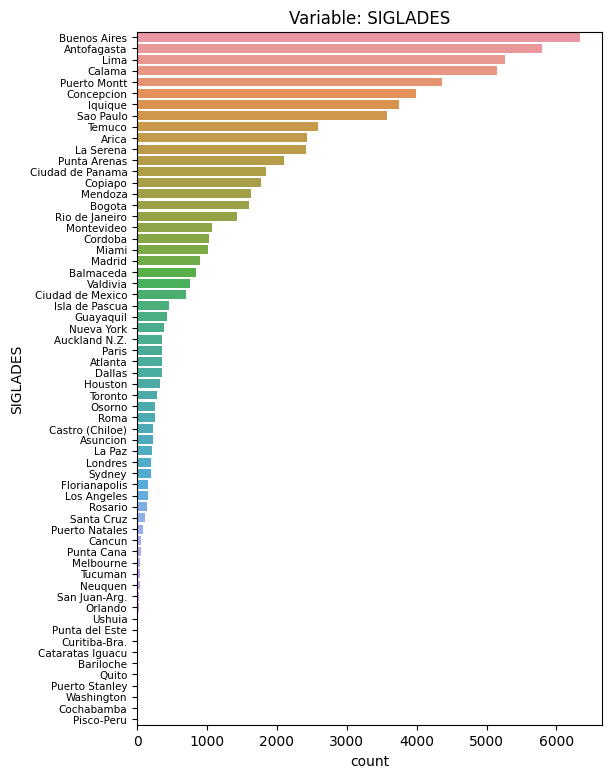

In [430]:
# Ver detalle de cada variable categorica

# recorrer cada variable categorica
for variable in datacat.columns.tolist():
    
    rint('-------------------------------')
    print('Variable: ',variable)
    
    conteo = datacat[[variable]] # seleccionar variable
    conteo["suma"] = 1   # variable auxiliar
    conteo = conteo.groupby(variable).agg(np.sum).sort_values("suma",ascending=False).reset_index() # conteo de valores por grupo
    conteo["%"] = np.round(100*conteo["suma"]/np.sum(conteo["suma"]),2) # calculo de porcentajes       
    print(conteo.head(60))
    
    cantidad = conteo.shape[0]
    
    if(cantidad < 10):
        figy = 2.5
        fsize = 13.0
    elif(cantidad < 25):
        figy = 4.0
        fsize = 11.0
    elif(cantidad < 45):
        figy = 6.0
        fsize = 9.0
    elif(cantidad < 60):
        figy = 7.5
        fsize = 8.5
    else:
        figy = 9.0 
        fsize = 7.5   
    
    plt.figure(figsize=(6,figy))
    b = sns.countplot(datacat,y=variable,order=datacat[variable].value_counts().index)
    b.set_yticklabels(datacat[variable].value_counts().index, size = fsize)
    plt.title("Variable: " + str(variable))
    plt.show()
    

<b>Variables Continuas

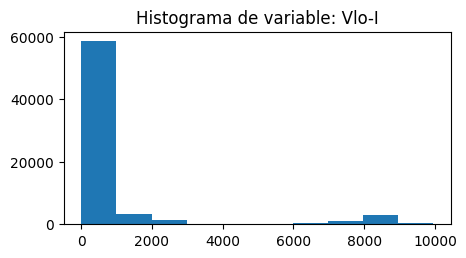

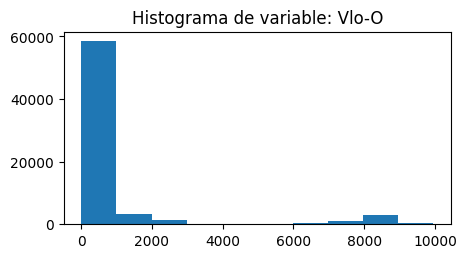

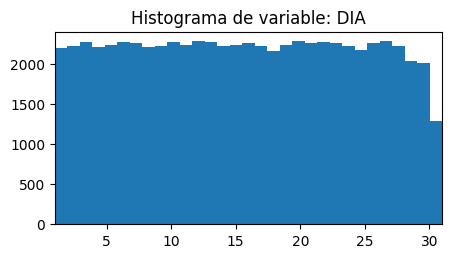

--------------------------
Variable:  DIA
    DIA  suma     %
0    20  2290  3.36
1    27  2286  3.35
2    12  2284  3.35
3    10  2283  3.35
4     6  2275  3.34
5    22  2272  3.33
6    13  2272  3.33
7     3  2271  3.33
8    16  2268  3.33
9    21  2267  3.32
10   26  2267  3.32
11    7  2264  3.32
12   23  2260  3.31
13    5  2241  3.29
14   15  2239  3.28
15   19  2238  3.28
16   11  2237  3.28
17   24  2232  3.27
18   28  2232  3.27
19   17  2228  3.27
20    9  2227  3.27
21    2  2223  3.26
22   14  2221  3.26
23    4  2215  3.25
24    8  2213  3.24
25    1  2208  3.24
26   25  2179  3.19
27   18  2160  3.17
28   29  2044  3.00
29   30  2020  2.96
30   31  1290  1.89
--------------------------
Variable:  MES
    MES  suma     %
0    12  6356  9.32
1     1  6108  8.96
2    11  6080  8.91
3    10  6032  8.84
4     7  5992  8.79
5     8  5744  8.42
6     9  5610  8.23
7     2  5561  8.15
8     3  5482  8.04
9     5  5240  7.68
10    4  5020  7.36
11    6  4981  7.30
----------------

In [404]:
# Analizar variable continuas

# seleccionar variables continuas
datacon = data.select_dtypes(exclude=["object"]).copy()

# funcion para mostrar distribucion
def graf_cont(datos,variable,figx=5,figy=2.5,tipo=1,min=None,max=None,bins=None):
    
    if(tipo==1):
        plt.figure(figsize=(figx,figy))
        if(min and max and bins):
            plt.hist(datos[variable],bins=bins)
            plt.xlim([min,max])
        elif(bins):
            plt.hist(datos[variable],bins=bins)
        else:
            plt.hist(datos[variable])
        plt.title('Histograma de variable: ' + str(variable))
        plt.show()
    
    elif(tipo==2):
        print('--------------------------')
        print('Variable: ',variable)
        conteo = datos[[variable]]
        conteo["suma"] = 1
        conteo = conteo.groupby(variable).agg(np.sum).sort_values("suma",ascending=False).reset_index()
        conteo["%"] = np.round(100*conteo["suma"]/np.sum(conteo["suma"]),2)        
        print(conteo)

# Graficar-Calcular
graf_cont(datacon,"Vlo-I",tipo=1)
graf_cont(datacon,"Vlo-O",tipo=1)
graf_cont(datacon,"DIA",min=1,max=31,bins=31,tipo=1)
graf_cont(datacon,"DIA",min=1,tipo=2)
graf_cont(datacon,"MES",tipo=2)
graf_cont(datacon,"AÑO",tipo=2)
